In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('2019-oct1.csv')
df2 = pd.read_csv('2019-nov1.csv')
df3 = pd.read_csv('2019-dec2.csv')

In [3]:
df = pd.concat([df1,df2,df3])

In [4]:
df.columns

Index(['Unnamed: 0', 'event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [5]:
timeseries_df = df[['event_time','event_type']]

In [6]:
timeseries_df.head()

,event_time,event_type
0,2019-10-01 00:00:00 UTC,cart
1,2019-10-01 00:00:03 UTC,cart
2,2019-10-01 00:00:07 UTC,cart
3,2019-10-01 00:00:07 UTC,cart
4,2019-10-01 00:00:15 UTC,cart


In [7]:
timeseries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62646 entries, 0 to 20285
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_time  62646 non-null  object
 1   event_type  62645 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [8]:
timeseries_df['event_time'] = pd.to_datetime(timeseries_df['event_time'],  infer_datetime_format=True)
#timeseries_df = timeseries_df.set_index(['event_time'])

In [9]:
timeseries_df.head()

,event_time,event_type
0,2019-10-01 00:00:00+00:00,cart
1,2019-10-01 00:00:03+00:00,cart
2,2019-10-01 00:00:07+00:00,cart
3,2019-10-01 00:00:07+00:00,cart
4,2019-10-01 00:00:15+00:00,cart


In [10]:
timeseries_df = timeseries_df.dropna()


In [11]:
timeseries_df['event_type'].unique()

array(['cart', 'view', 'remove_from_cart', 'purchase'], dtype=object)

In [12]:
timeseries_df['event_type'].value_counts()

view                27801
cart                17769
remove_from_cart    12606
purchase             4469
Name: event_type, dtype: int64

In [13]:
timeseries_purchase_df = timeseries_df.loc[timeseries_df['event_type']=='purchase']

In [14]:
timeseries_purchase_df.shape

(4469, 2)

In [15]:
replace_purchase = {'event_type':{'purchase':1}}

In [16]:
timeseries_purchase_df = timeseries_purchase_df.replace(replace_purchase)

In [17]:
timeseries_purchase_df.head()

,event_time,event_type
202,2019-10-01 00:06:35+00:00,1
204,2019-10-01 00:06:35+00:00,1
205,2019-10-01 00:06:35+00:00,1
206,2019-10-01 00:06:35+00:00,1
207,2019-10-01 00:06:35+00:00,1


In [18]:
timeseries_purchase_df['date'] = pd.to_datetime(timeseries_purchase_df['event_time']).dt.date

In [19]:
timeseries_purchase_df.head()

,event_time,event_type,date
202,2019-10-01 00:06:35+00:00,1,2019-10-01
204,2019-10-01 00:06:35+00:00,1,2019-10-01
205,2019-10-01 00:06:35+00:00,1,2019-10-01
206,2019-10-01 00:06:35+00:00,1,2019-10-01
207,2019-10-01 00:06:35+00:00,1,2019-10-01


In [20]:
timeseries_purchase_df = timeseries_purchase_df.drop(columns = 'event_time',axis=1)

In [21]:
timeseries_purchase_df.head()

,event_type,date
202,1,2019-10-01
204,1,2019-10-01
205,1,2019-10-01
206,1,2019-10-01
207,1,2019-10-01


In [22]:
timeseries_purchase_df = timeseries_purchase_df.iloc[:,[1,0]]
timeseries_purchase_df.head()

,date,event_type
202,2019-10-01,1
204,2019-10-01,1
205,2019-10-01,1
206,2019-10-01,1
207,2019-10-01,1


In [23]:
timeseries_purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4469 entries, 202 to 20256
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        4469 non-null   object
 1   event_type  4469 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 104.7+ KB


In [24]:
timeseries_purchase_df['date'] = pd.to_datetime(timeseries_purchase_df['date'])
timeseries_purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4469 entries, 202 to 20256
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        4469 non-null   datetime64[ns]
 1   event_type  4469 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 104.7 KB


In [25]:
grouped_df = timeseries_purchase_df.groupby(pd.Grouper(key='date',axis=0,freq='1D', sort=True)).sum()
grouped_df.head()

,event_type
date,
2019-10-01,1515
2019-10-02,0
2019-10-03,0
2019-10-04,0
2019-10-05,0


In [61]:
grouped_df.tail(50)

,event_type
date,
2019-11-12,0
2019-11-13,0
2019-11-14,0
2019-11-15,0
2019-11-16,0
2019-11-17,0
2019-11-18,0
2019-11-19,0
2019-11-20,0


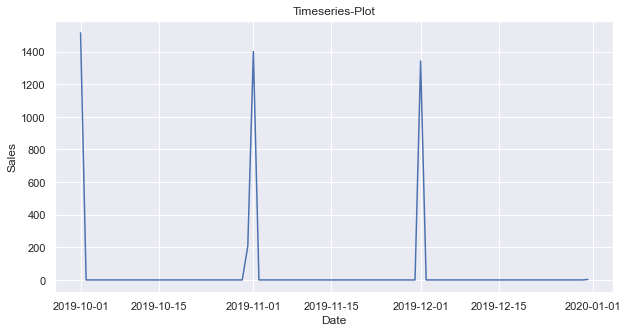

In [57]:
plt.figure(figsize=(10,5))
plt.title('Timeseries-Plot')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(grouped_df)

In [99]:
from statsmodels.tsa.stattools import adfuller
print("Dickey-Fuller test: ")
dftest = adfuller(grouped_df['event_type'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','lags used','No. of obs'])
for key,value in dftest[4].items():
    dfoutput['Critical  Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller test: 
Test statistic          -1.158956e+01
p-value                  2.813457e-21
lags used                0.000000e+00
No. of obs               9.100000e+01
Critical  Value (1%)    -3.504343e+00
Critical  Value (5%)    -2.893866e+00
Critical  Value (10%)   -2.584015e+00
dtype: float64


In [330]:
data = grouped_df

In [101]:
rolmean= data.rolling(window=12).mean()
rolstd = data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            event_type
date                  
2019-10-01         NaN
2019-10-02         NaN
2019-10-03         NaN
2019-10-04         NaN
2019-10-05         NaN
2019-10-06         NaN
2019-10-07         NaN
2019-10-08         NaN
2019-10-09         NaN
2019-10-10         NaN
2019-10-11         NaN
2019-10-12      126.25
2019-10-13        0.00
2019-10-14        0.00
2019-10-15        0.00
            event_type
date                  
2019-10-01         NaN
2019-10-02         NaN
2019-10-03         NaN
2019-10-04         NaN
2019-10-05         NaN
2019-10-06         NaN
2019-10-07         NaN
2019-10-08         NaN
2019-10-09         NaN
2019-10-10         NaN
2019-10-11         NaN
2019-10-12  437.342829
2019-10-13    0.000000
2019-10-14    0.000000
2019-10-15    0.000000


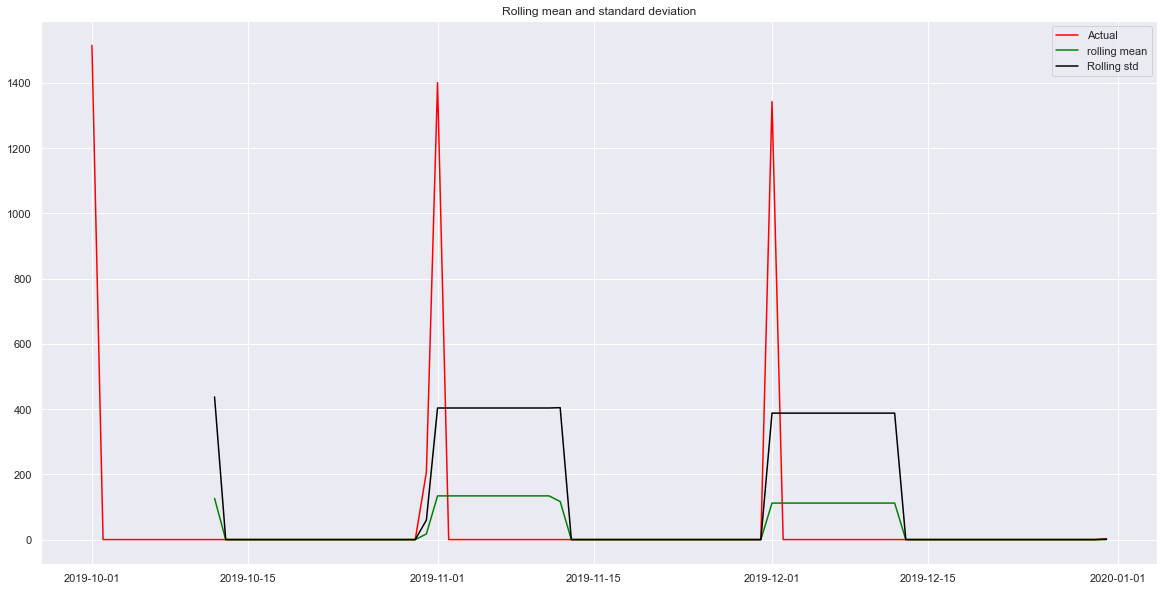

In [102]:
plt.figure(figsize=(20,10))
actual=plt.plot(data,color='red',label='Actual')
mean_6 = plt.plot(rolmean,color='green',label='rolling mean')
std_6=plt.plot(rolstd,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

In [103]:
def stationarity(timeseries):
    
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries,color='red',label='Actual')
    mean_6 = plt.plot(rolmean,color='green',label='rolling mean')
    std_6=plt.plot(rolstd,color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title("Rolling mean and standard deviation")
    plt.show(block=False)
    
    print("Dickey-Fuller test: ")
    dftest = adfuller(timeseries['event_type'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','lags used','No. of obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical  Value (%s)'%key] = value
    print(dfoutput)

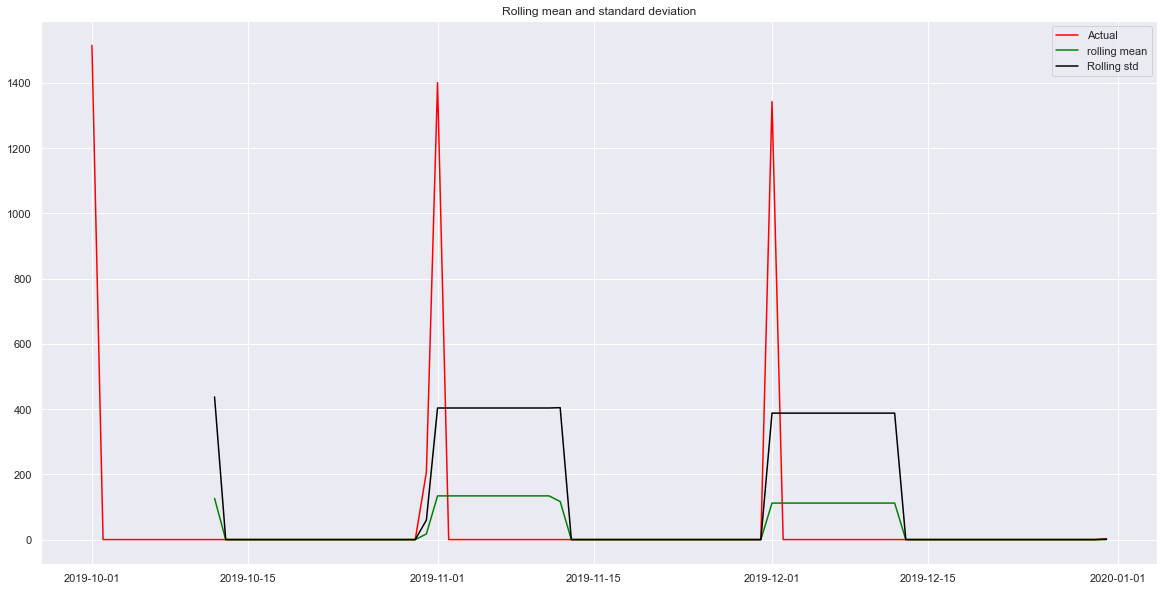

Dickey-Fuller test: 
Test statistic          -1.158956e+01
p-value                  2.813457e-21
lags used                0.000000e+00
No. of obs               9.100000e+01
Critical  Value (1%)    -3.504343e+00
Critical  Value (5%)    -2.893866e+00
Critical  Value (10%)   -2.584015e+00
dtype: float64


In [331]:
stationarity(data)

In [332]:
data = data.dropna()
data.head()

,event_type
date,
2019-10-01,1515
2019-10-02,0
2019-10-03,0
2019-10-04,0
2019-10-05,0


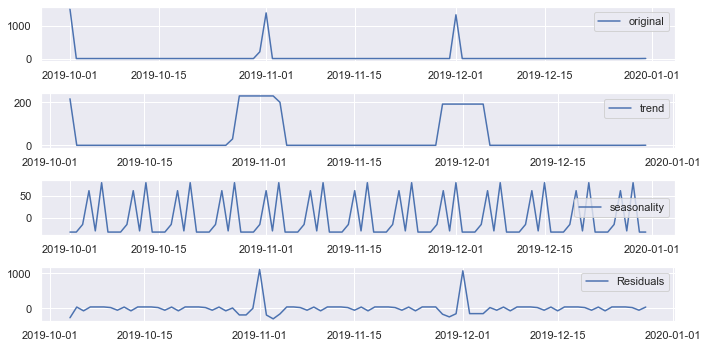

In [423]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(data)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid
plt.figure(figsize = (10,5))
plt.subplot(411)
plt.plot(data,label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Text(0.5, 1.0, 'Partial AutoCorrelation Function')

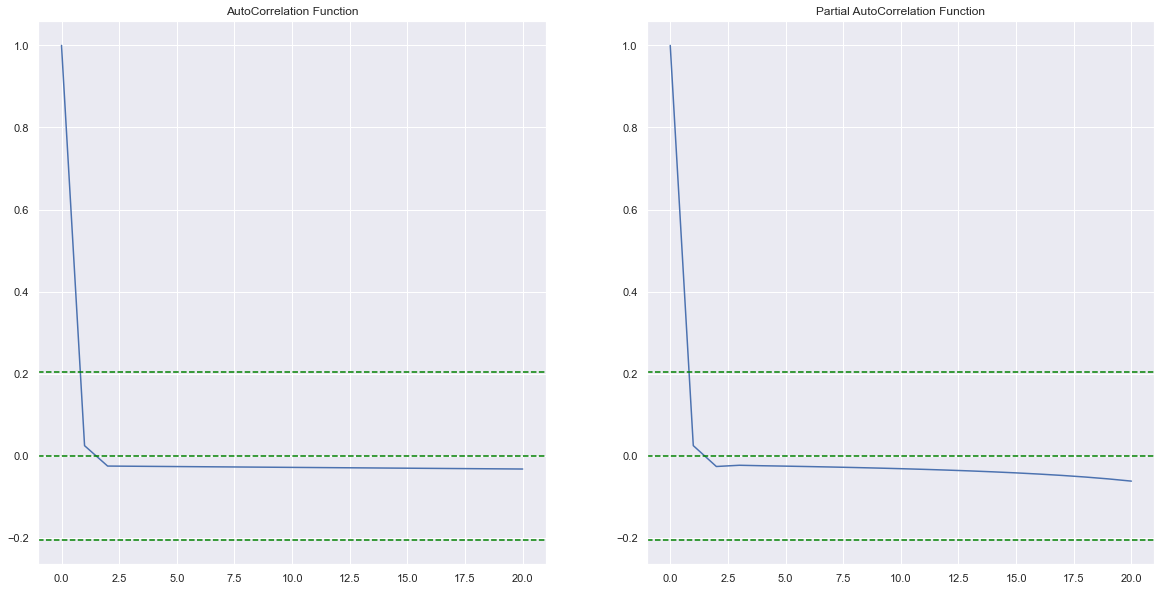

In [334]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y = -1.96/np.sqrt(len(data)),linestyle='--',color='green')
plt.axhline(y = 1.96/np.sqrt(len(data)),linestyle='--',color='green')
plt.title('AutoCorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y = -1.96/np.sqrt(len(data)),linestyle='--',color='green')
plt.axhline(y = 1.96/np.sqrt(len(data)),linestyle='--',color='green')
plt.title('Partial AutoCorrelation Function')

In [473]:
#take first order difference
data_1 = data['event_type'].diff(2)
data_1.dropna(inplace=True)
plt.figure(figsize=(5,5))
#fig = seasonal_decompose(data_1, model='additive', freq=30).plot()
plt.tight_layout()

<Figure size 360x360 with 0 Axes>

In [482]:
data_1.head(50)

date
2019-10-03   -1515.0
2019-10-04       0.0
2019-10-05       0.0
2019-10-06       0.0
2019-10-07       0.0
2019-10-08       0.0
2019-10-09       0.0
2019-10-10       0.0
2019-10-11       0.0
2019-10-12       0.0
2019-10-13       0.0
2019-10-14       0.0
2019-10-15       0.0
2019-10-16       0.0
2019-10-17       0.0
2019-10-18       0.0
2019-10-19       0.0
2019-10-20       0.0
2019-10-21       0.0
2019-10-22       0.0
2019-10-23       0.0
2019-10-24       0.0
2019-10-25       0.0
2019-10-26       0.0
2019-10-27       0.0
2019-10-28       0.0
2019-10-29       0.0
2019-10-30       0.0
2019-10-31     207.0
2019-11-01    1401.0
2019-11-02    -207.0
2019-11-03   -1401.0
2019-11-04       0.0
2019-11-05       0.0
2019-11-06       0.0
2019-11-07       0.0
2019-11-08       0.0
2019-11-09       0.0
2019-11-10       0.0
2019-11-11       0.0
2019-11-12       0.0
2019-11-13       0.0
2019-11-14       0.0
2019-11-15       0.0
2019-11-16       0.0
2019-11-17       0.0
2019-11-18       0.0
2019-11-

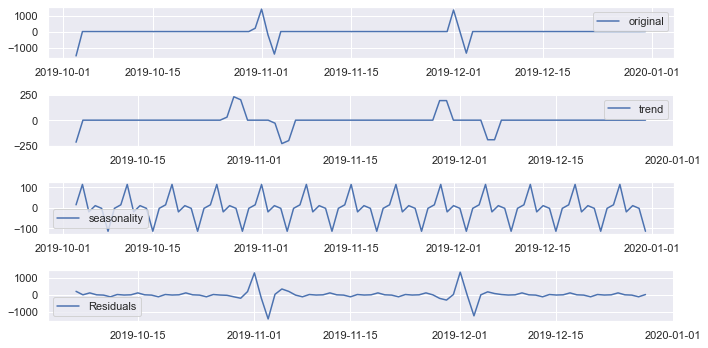

In [474]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(data_1)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid
plt.figure(figsize = (10,5))
plt.subplot(411)
plt.plot(data_1,label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [259]:
data_1.head(50)

date
2019-10-02   -1515.0
2019-10-03       0.0
2019-10-04       0.0
2019-10-05       0.0
2019-10-06       0.0
2019-10-07       0.0
2019-10-08       0.0
2019-10-09       0.0
2019-10-10       0.0
2019-10-11       0.0
2019-10-12       0.0
2019-10-13       0.0
2019-10-14       0.0
2019-10-15       0.0
2019-10-16       0.0
2019-10-17       0.0
2019-10-18       0.0
2019-10-19       0.0
2019-10-20       0.0
2019-10-21       0.0
2019-10-22       0.0
2019-10-23       0.0
2019-10-24       0.0
2019-10-25       0.0
2019-10-26       0.0
2019-10-27       0.0
2019-10-28       0.0
2019-10-29       0.0
2019-10-30       0.0
2019-10-31     207.0
2019-11-01    1194.0
2019-11-02   -1401.0
2019-11-03       0.0
2019-11-04       0.0
2019-11-05       0.0
2019-11-06       0.0
2019-11-07       0.0
2019-11-08       0.0
2019-11-09       0.0
2019-11-10       0.0
2019-11-11       0.0
2019-11-12       0.0
2019-11-13       0.0
2019-11-14       0.0
2019-11-15       0.0
2019-11-16       0.0
2019-11-17       0.0
2019-11-

In [260]:
#creating shift df
data_shift = data-data.shift(1)
data_shift.head()

,event_type,forecast
date,,
2019-10-01,NaN,NaN
2019-10-02,-1515.0,NaN
2019-10-03,0.0,NaN
2019-10-04,0.0,NaN
2019-10-05,0.0,NaN


In [97]:
data_shift.head()

,event_type,forecast
date,,
2019-10-01,NaN,NaN
2019-10-02,-1515.0,NaN
2019-10-03,0.0,NaN
2019-10-04,0.0,NaN
2019-10-05,0.0,NaN


In [94]:
data_shift=data_shift.dropna()

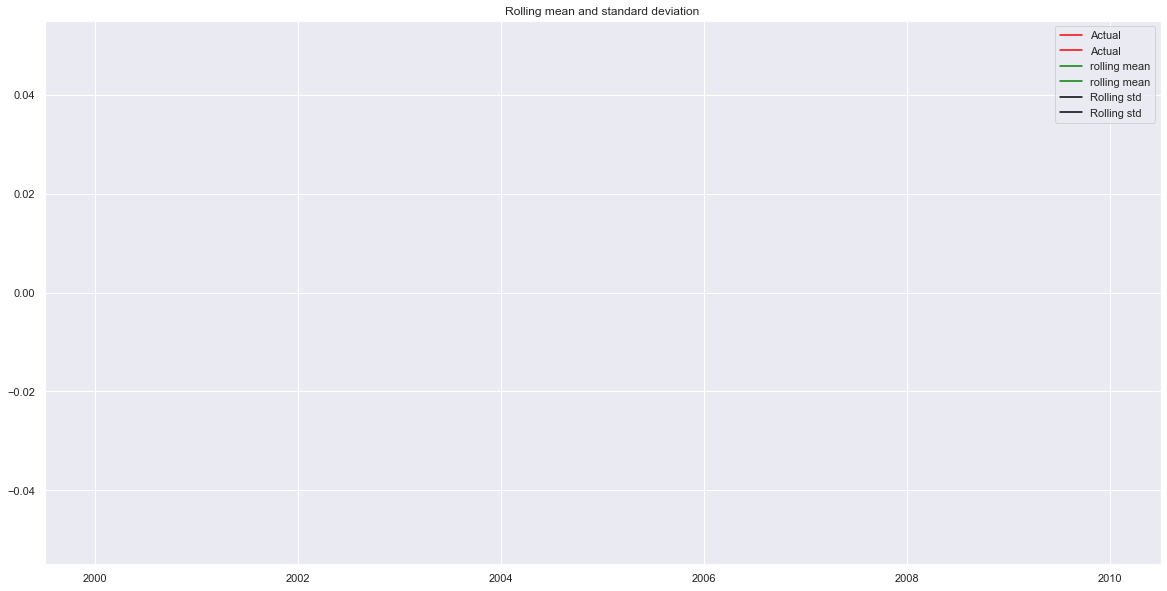

Dickey-Fuller test: 


ValueError: sample size is too short to use selected regression component

In [95]:
stationarity(data_shift)

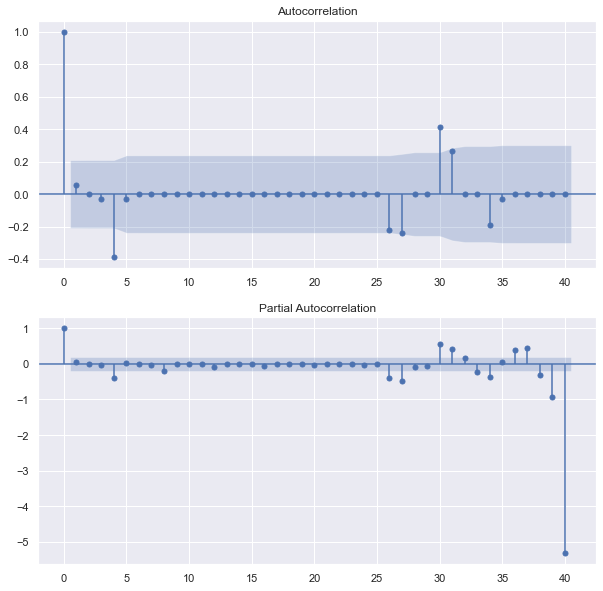

In [444]:
import statsmodels.api as sm
fig, ax = plt.subplots(2)
ax[0] = sm.graphics.tsa.plot_acf(data_1, lags=40, ax=ax[0])
ax[1] = sm.graphics.tsa.plot_pacf(data_1, lags=40, ax=ax[1])

Text(0.5, 1.0, 'Partial AutoCorrelation Function')

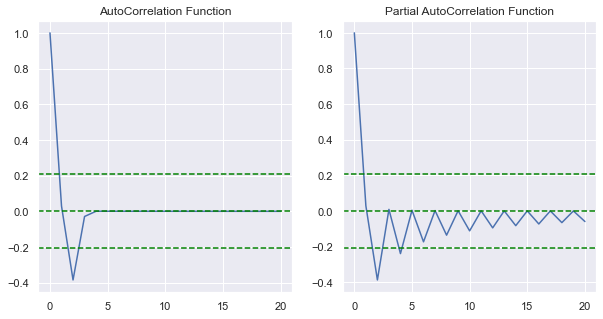

In [483]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(data_1, nlags=20)
lag_pacf = pacf(data_1, nlags=20, method='ols')

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y = -1.96/np.sqrt(len(data_1)),linestyle='--',color='green')
plt.axhline(y = 1.96/np.sqrt(len(data_1)),linestyle='--',color='green')
plt.title('AutoCorrelation Function')

plt.subplot(122)

plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y = -1.96/np.sqrt(len(data_1)),linestyle='--',color='green')
plt.axhline(y = 1.96/np.sqrt(len(data_1)),linestyle='--',color='green')
plt.title('Partial AutoCorrelation Function')

In [119]:
!pip install --user statsmodels -U

plotting ARIMA model


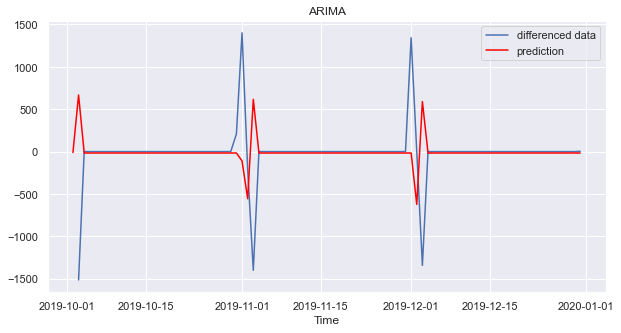

In [508]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(10,5))
model = ARIMA(data,order=(1,1,0))
results = model.fit(disp=-1)
plt.plot(data_1,label = 'differenced data')
plt.plot(results.fittedvalues,color='red',label='prediction')
plt.title("ARIMA")
plt.xlabel('Time')
#plt.ylabel('sales')
plt.legend()
print('plotting ARIMA model')

In [454]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D2.event_type   No. Observations:                   90
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -666.920
Method:                       css-mle   S.D. of innovations            398.785
Date:                Thu, 06 Oct 2022   AIC                           1339.841
Time:                        00:02:38   BIC                           1347.340
Sample:                    10-03-2019   HQIC                          1342.865
                         - 12-31-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.4067     25.829      0.403      0.687     -40.217      61.030
ar.L1.D2.event_type    -0.6349      0.087     -7.323      0.000      -0.805      -0.465
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5751           +0.0000j            1.5751            0.5000
-----------------------------------------------------------------------------
"""

In [409]:
!pip install pmdarima

  Using cached pmdarima-2.0.1-cp39-cp39-win_amd64.whl (571 kB)


In [410]:
import pmdarima as pm

In [411]:
model_fit = pm.auto_arima(data, test='adf', 
                         max_p=3, max_d=3, max_q=3, 
                         seasonal=True, m=12,
                         max_P=3, max_D=2, max_Q=3,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1283.207, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1287.029, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1287.013, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1284.538, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1285.107, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1285.093, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1285.121, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1285.113, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1287.181, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.384 seconds


In [477]:
predictions = pd.Series(results.fittedvalues,  copy=True)
print(predictions.head())

date
2019-10-03     10.406651
2019-10-04   -944.856886
2019-10-05     17.013814
2019-10-06     17.013814
2019-10-07     17.013814
Freq: D, dtype: float64


In [478]:
predictions_cum_sum = predictions.cumsum()
print(predictions_cum_sum.head())

date
2019-10-03     10.406651
2019-10-04   -934.450235
2019-10-05   -917.436421
2019-10-06   -900.422607
2019-10-07   -883.408792
Freq: D, dtype: float64


In [479]:
predictions_log = pd.Series(data['event_type'].iloc[0],index= data.index)
predictions_log = predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

date
2019-10-01    1515.000000
2019-10-02    1515.000000
2019-10-03    1525.406651
2019-10-04     580.549765
2019-10-05     597.563579
Freq: D, dtype: float64

(-2000.0, 2000.0)

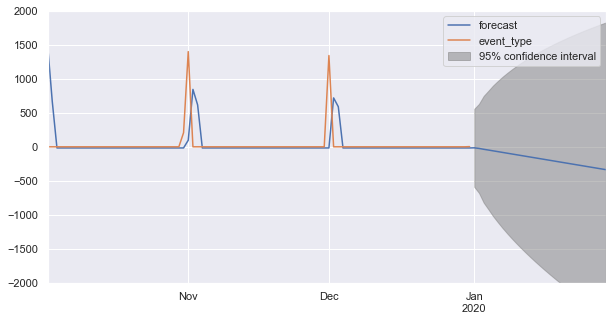

In [516]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,5

results.plot_predict(1,120)
#from statsmodels.graphics.tsaplots import plot_predict
#plot_predict(results)
x = results.forecast(steps=50)
plt.ylim(top=2000,bottom=-2000)

<AxesSubplot:xlabel='date'>

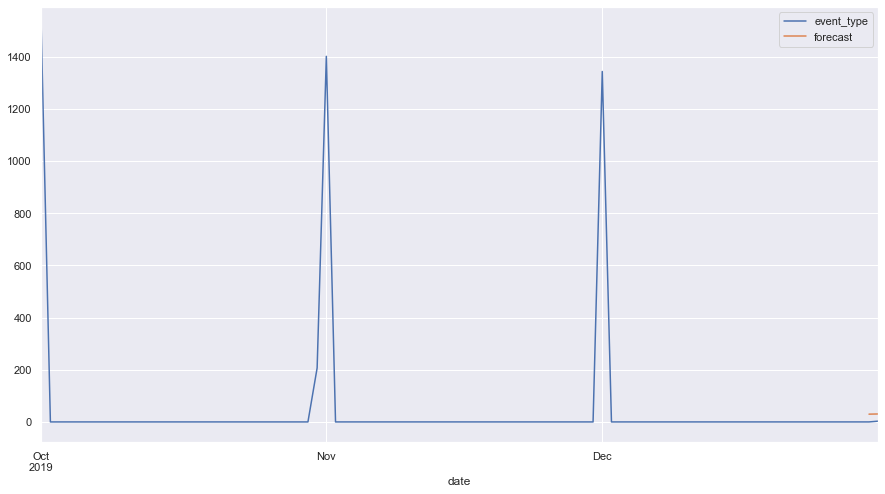

In [208]:
data_2 = data
data_2['forecast']=results.predict(start=89,end=200,dynamic=False)
data_2[['event_type','forecast']].plot(figsize=(15,8))

In [77]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [78]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [79]:
future_datest_df.tail()

,event_type,forecast
2021-07-31,NaN,NaN
2021-08-31,NaN,NaN
2021-09-30,NaN,NaN
2021-10-31,NaN,NaN
2021-11-30,NaN,NaN


In [80]:
future_df=pd.concat([data,future_datest_df])

<AxesSubplot:>

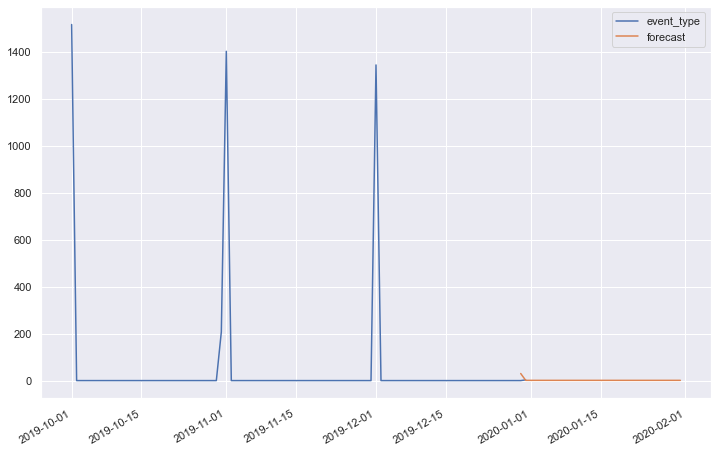

In [209]:
future_df['forecast'] = results.predict(start = 89, end = 123, dynamic= True)  
future_df[['event_type', 'forecast']].plot(figsize=(12, 8)) 

# Using SARIMAX

In [301]:
data = data.drop(columns=['forecast','Seasonal First Difference'],axis=1)

In [302]:
data.head()

,event_type
date,
2019-10-01,1515
2019-10-02,0
2019-10-03,0
2019-10-04,0
2019-10-05,0


In [303]:
data['event_type'].shift(30).head()

date
2019-10-01   NaN
2019-10-02   NaN
2019-10-03   NaN
2019-10-04   NaN
2019-10-05   NaN
Freq: D, Name: event_type, dtype: float64

In [305]:
data['Seasonal First Difference'] = data['event_type']-data['event_type'].shift(1)

In [306]:
data.head(50)

,event_type,Seasonal First Difference
date,,
2019-10-01,1515,NaN
2019-10-02,0,-1515.0
2019-10-03,0,0.0
2019-10-04,0,0.0
2019-10-05,0,0.0
2019-10-06,0,0.0
2019-10-07,0,0.0
2019-10-08,0,0.0
2019-10-09,0,0.0


In [276]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [307]:
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.995801494491456
p-value : 7.539530710538796e-10
#Lags Used : 4
Number of Observations Used : 86
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='date'>

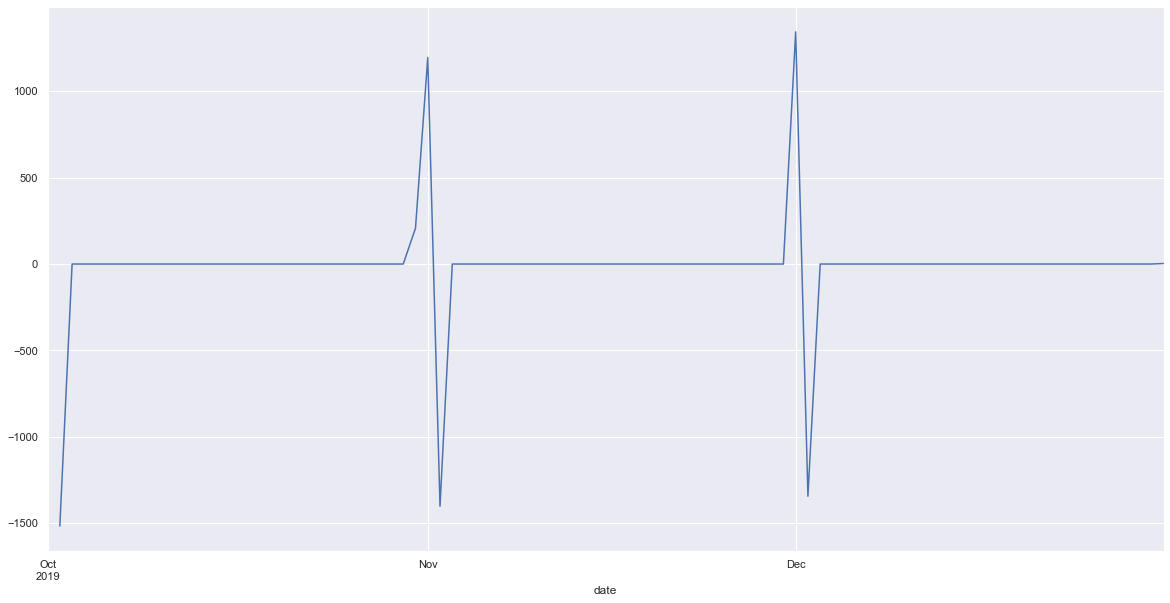

In [308]:
data['Seasonal First Difference'].plot()

Final Thoughts on Autocorrelation and Partial Autocorrelation

Identification of an AR model is often best done with the PACF.
For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags

p=5,d=4,q=4

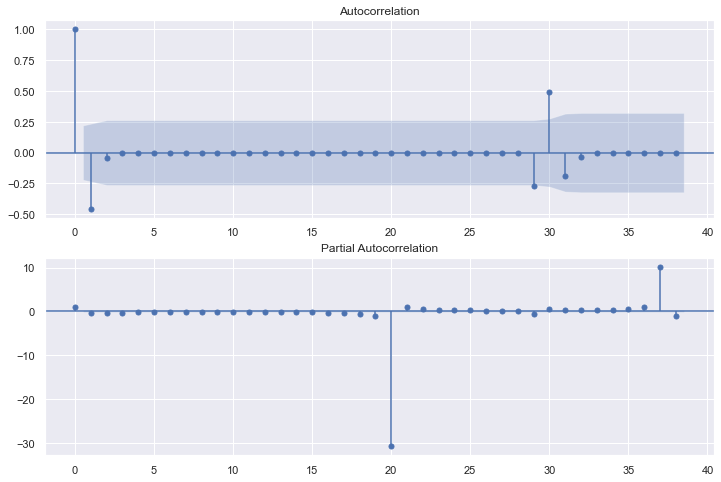

In [309]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Seasonal First Difference'].iloc[13:],lags=38,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal First Difference'].iloc[13:],lags=38,ax=ax2)

## ARIMA

In [281]:
from statsmodels.tsa.arima_model import ARIMA

In [468]:
model=ARIMA(data['event_type'],order=(1,2,0))
model_fit=model.fit()

In [469]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D2.event_type   No. Observations:                   90
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -666.920
Method:                       css-mle   S.D. of innovations            398.785
Date:                Thu, 06 Oct 2022   AIC                           1339.841
Time:                        00:07:19   BIC                           1347.340
Sample:                    10-03-2019   HQIC                          1342.865
                         - 12-31-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.4067     25.829      0.403      0.687     -40.217      61.030
ar.L1.D2.event_type    -0.6349      0.087     -7.323      0.000      -0.805      -0.465
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5751           +0.0000j            1.5751            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='date'>

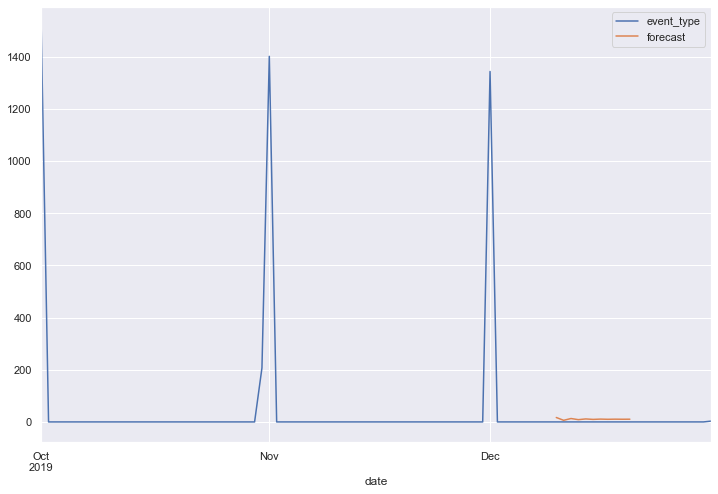

In [470]:
data['forecast']=model_fit.predict(start=70,end=80,dynamic=True)
data[['event_type','forecast']].plot(figsize=(12,8))

In [226]:
import statsmodels.api as sm

In [464]:
model=sm.tsa.statespace.SARIMAX(data['event_type'],order=(1, 2, 0),seasonal_order=(1,2,0,2))
results_3=model.fit()


In [465]:
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        event_type   No. Observations:                   92
Model:             SARIMAX(1, 2, 0)x(1, 2, 0, 2)   Log Likelihood                -692.425
Date:                           Thu, 06 Oct 2022   AIC                           1390.851
Time:                                   00:06:22   BIC                           1398.214
Sample:                               10-01-2019   HQIC                          1393.814
                                    - 12-31-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4859      0.077     -6.281      0.000      -0.637      -0.334
ar.S.L2       -0.6856      0.052    -13.082      0.000      -0.788      -0.583
sigma2      5.699e+05   4.83e+04     11.791      0.000    4.75e+05    6.65e+05
===================================================================================
Ljung-Box (L1) (Q):                   8.89   Jarque-Bera (JB):               299.46
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             1.09
Prob(H) (two-sided):                  0.65   Kurtosis:                        11.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

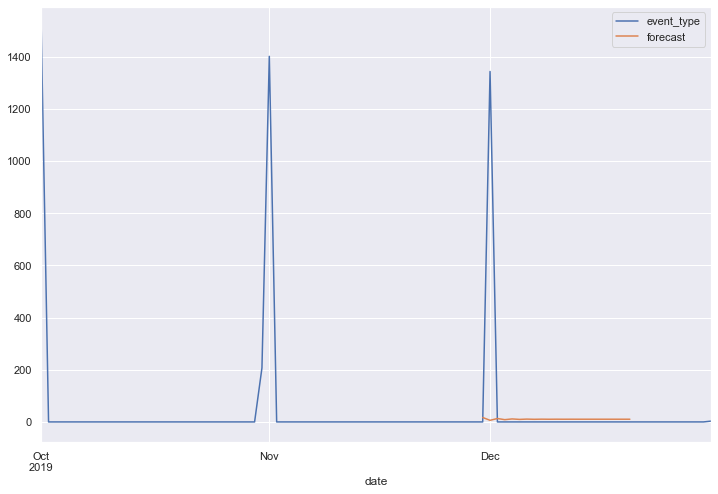

In [466]:
data['forecast']=results.predict(start=60,end=80,dynamic=True)
data[['event_type','forecast']].plot(figsize=(12,8))


In [471]:
#data['forecast']=results.predict(start=90,end=103,dynamic=True)
#data[['event_type','forecast']].plot(figsize=(12,8))
data = data.drop(columns = 'forecast',axis=1)

In [ ]:
predictions = pd.Series(results.fittedvalues,  copy=True)
print(predictions.head())

In [ ]:
predictions_cum_sum = predictions.cumsum()
print(predictions_cum_sum.head())

In [ ]:
predictions_log = pd.Series(data['event_type'].iloc[0],index= data.index)
predictions_log = predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x = results.forecast(steps=120)